# Cherry Ho

## Research question/interests

- How many countries won as away teams?
- Which country has the most golds as away teams?
- How many average goals did each countries score? Which country has the most (let me guess. Brazil)

In [ ]:
import project_functions2 as p2
import seaborn as sns

In [ ]:
raw=p2.pd.read_csv("../data/raw/WorldCups.csv")
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [ ]:
raw.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
raw.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [ ]:
raw.shape

(20, 10)

In [ ]:
raw.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [ ]:
raw.nunique()

Year              20
Country           15
Winner             9
Runners-Up        10
Third             14
Fourth            16
GoalsScored       17
QualifiedTeams     5
MatchesPlayed      9
Attendance        20
dtype: int64

### Task 2: Data Analysis Pipeline

In [ ]:
df = p2.load_and_process("../data/raw/WorldCups.csv")
df

,Year,Winner,GoalsScored
0,1938,Italy,84
1,1950,Uruguay,88
2,1954,Germany,140
3,1958,Brazil,126
4,1962,Brazil,89
5,1970,Brazil,95
6,1982,Italy,146
7,1986,Argentina,132
8,1990,Germany,115
9,1994,Brazil,141


In [ ]:
df.to_csv('CleanedWorldCups(Analysis2).csv',index=False)

## EDA

In [ ]:
df.nunique()

Winner    6
dtype: int64

Conclusion 1: 6 countries have won as visiting teams (There are around 200 countries. Guess sports are just for the rich)

In [ ]:
df['Winner'].value_counts(ascending=False)

Brazil       5
Italy        3
Germany      3
Uruguay      1
Argentina    1
Spain        1
Name: Winner, dtype: int64

<AxesSubplot:title={'center':'# of times a country won as an away team'}>

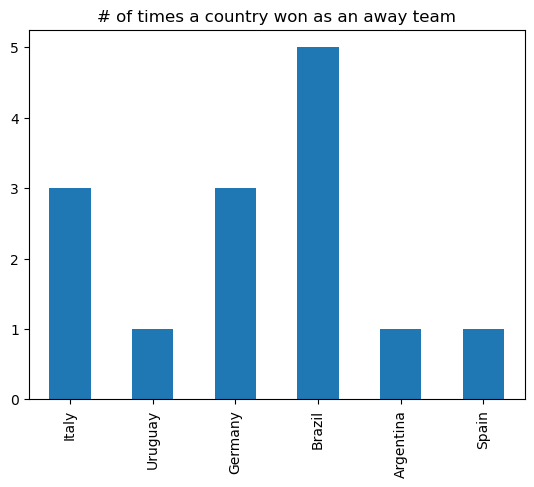

In [ ]:
#A Plot of how many times a country won as home team
# sns.countplot(x='Winner',data=df)
df['Winner'].value_counts(sort=False).plot.bar(title="# of times a country won as an away team")


Conclusion 2: Brazil wins the most cup (the legend is real after all. As someone who hating watching sports, I guess I learn sth new).

In [ ]:
df2=df.drop("Year", axis=1).groupby("Winner").mean().reset_index()
df2

,Winner,GoalsScored
0,Argentina,132.000000
1,Brazil,122.400000
2,Germany,142.000000
3,Italy,125.666667
4,Spain,145.000000
5,Uruguay,88.000000


[Text(0.5, 1.0, 'Average Goals Scored per Winning Countries')]

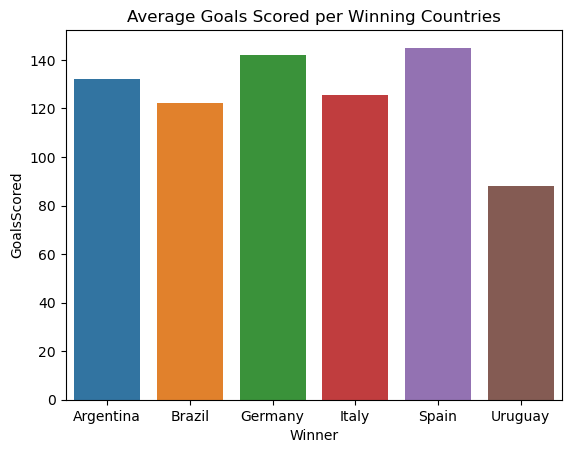

In [ ]:
sns.barplot(x='Winner',y='GoalsScored',data=df2).set(title="Average Goals Scored per Winning Countries")

Conclusion 3: Turns out it is Spain. Maybe Brasil's opponents are either terrible or terrified.